In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [2]:
# tfds.disable_progress_bar()

# Split data，0~80%是training，80~90%是validation，90~100%是testing
(train, validation, test), metadata = tfds.load(
    'horses_or_humans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
get_label_name = metadata.features['label'].int2str  # 創建一個我們可以用來獲取標籤的函數對象

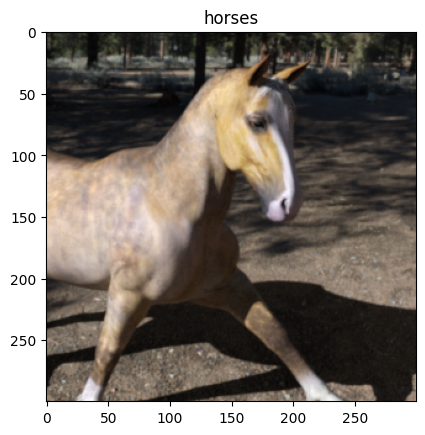

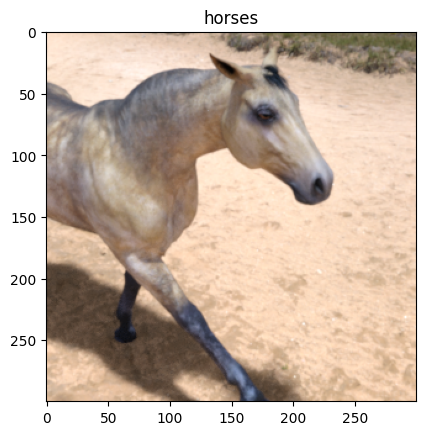

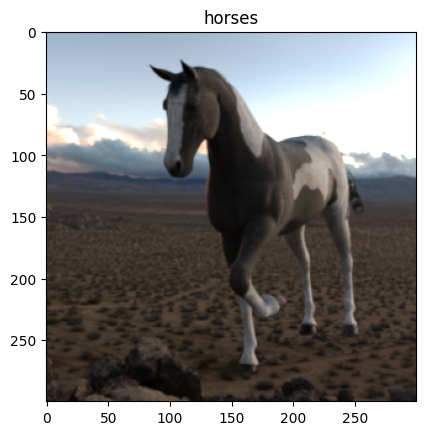

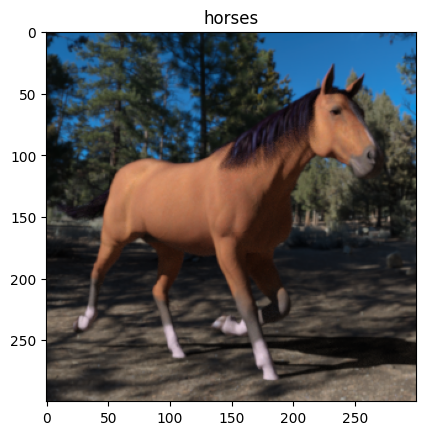

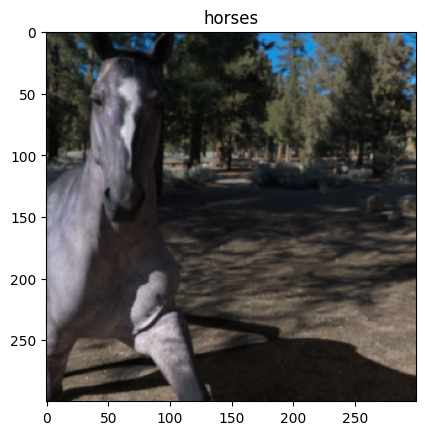

In [4]:
# 顯示DataSet images
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [5]:
IMG_SIZE = 200

def img_format(image, label):
  image = tf.cast(image, tf.float32) #型別轉換
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [6]:
#用map調用Function調整所有images
train = train.map(img_format)
validation = validation.map(img_format)
test = test.map(img_format)

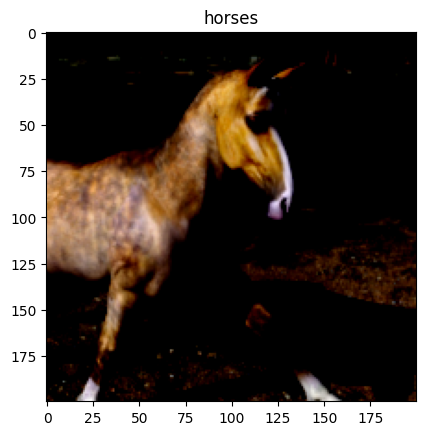

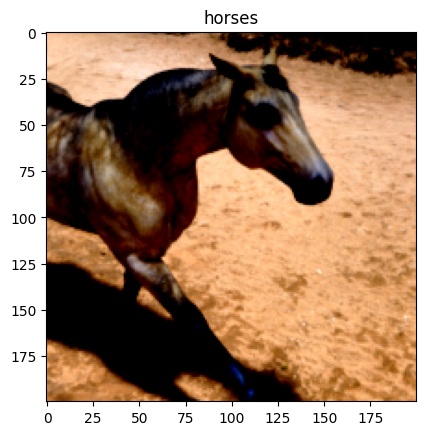

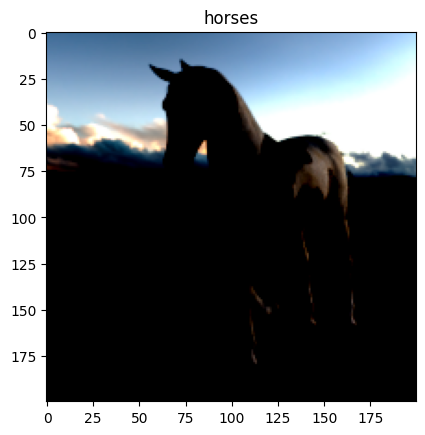

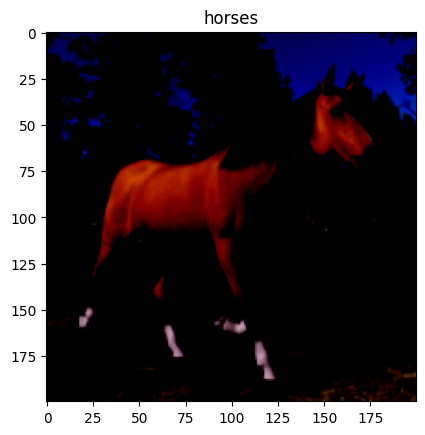

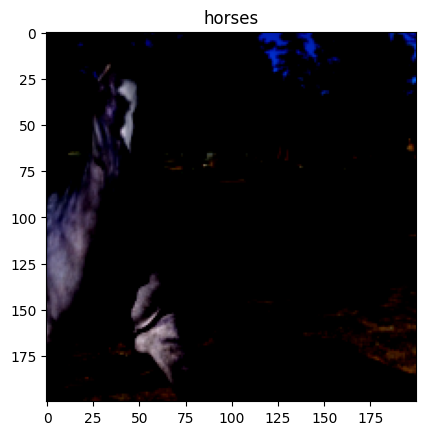

In [7]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [25]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

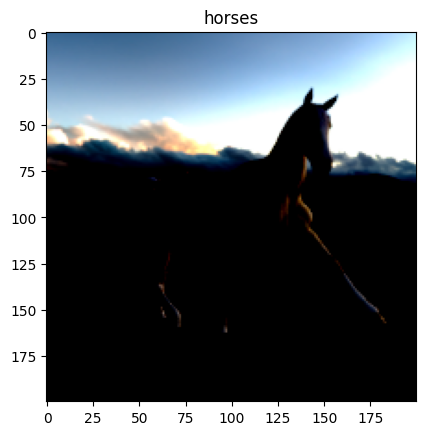

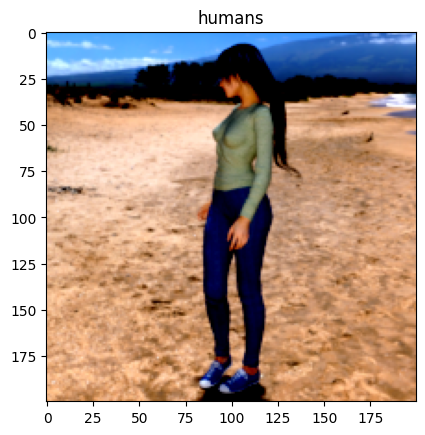

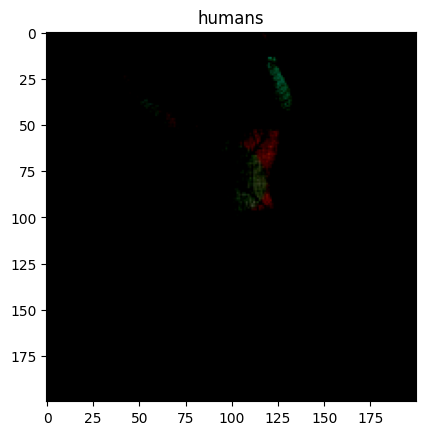

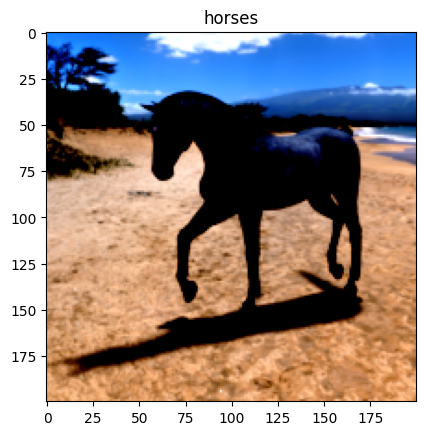

In [20]:
for image, label in test_batches.take(5):
  plt.figure()
  plt.imshow(image[1])
  plt.title(get_label_name(label[1]))

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape= (IMG_SIZE, IMG_SIZE, 3),
                        include_top=False, # 只訓練2種類別(馬和人)，不需要加載V2中所有的類別 
                        weights='imagenet')

In [27]:
base_model.trainable = False 

In [28]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [29]:
#Add our own layer
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [30]:
base_learning_rate = 0.0001 #不更改原本的權重
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# 更改前
initial_epochs = 10
validation_steps= 2

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

2/2 [==============================] - 0s 23ms/step - loss: 0.8986 - accuracy: 0.5469


In [33]:
#更改後
history = model.fit(train_batches,
          epochs=initial_epochs,
          validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/10
26/26 [==============================] - 3s 36ms/step - loss: 0.6147 - accuracy: 0.6886 - val_loss: 0.5453 - val_accuracy: 0.8529
Epoch 2/10
26/26 [==============================] - 1s 36ms/step - loss: 0.4509 - accuracy: 0.8443 - val_loss: 0.3981 - val_accuracy: 0.9510
Epoch 3/10
26/26 [==============================] - 1s 36ms/step - loss: 0.3402 - accuracy: 0.9343 - val_loss: 0.2957 - val_accuracy: 0.9804
Epoch 4/10
26/26 [==============================] - 1s 37ms/step - loss: 0.2569 - accuracy: 0.9769 - val_loss: 0.2190 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 1s 36ms/step - loss: 0.1946 - accuracy: 0.9939 - val_loss: 0.1668 - val_accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 1s 37ms/step - loss: 0.1483 - accuracy: 0.9964 - val_loss: 0.1269 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 1s 36ms/step - loss: 0.1133 - accuracy: 0.9964 - val_loss: 0.0969 - val_accuracy: 1.0000
Epoch 8/10
26

In [39]:
test_loss, test_acc = model.evaluate(test_batches, verbose=2)

4/4 - 0s - loss: 0.0494 - accuracy: 1.0000


C:\Users\x9172\anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


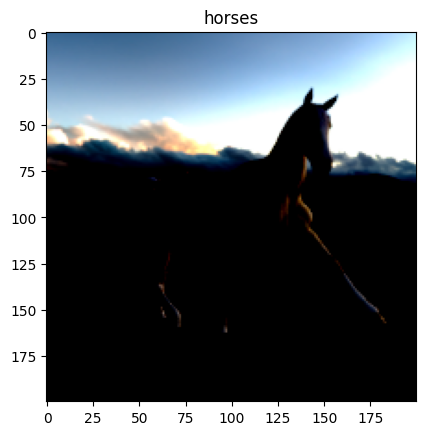

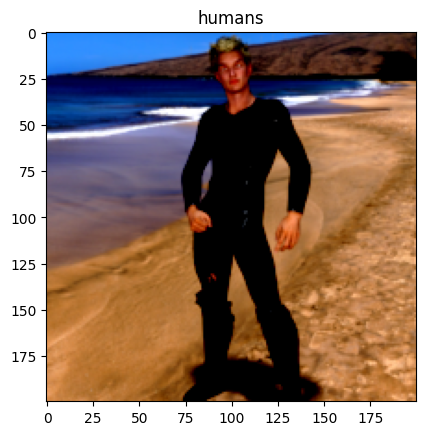

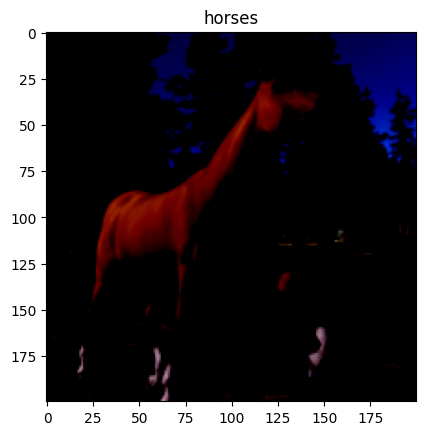

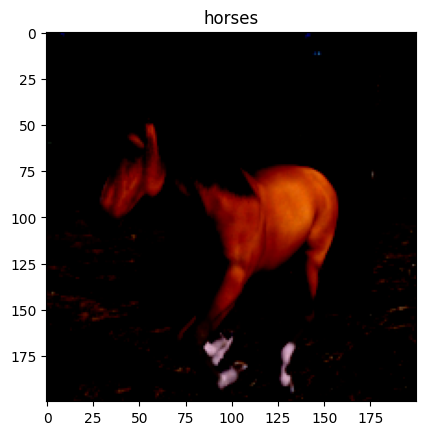

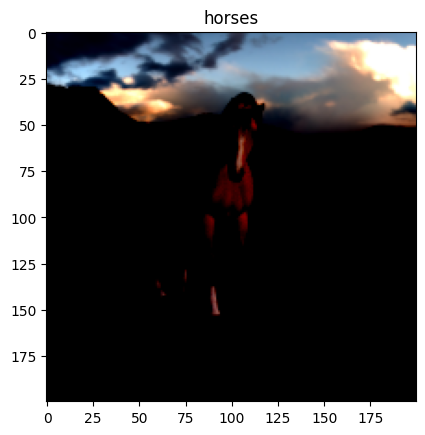

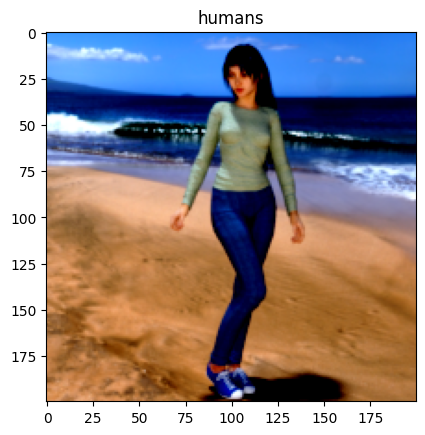

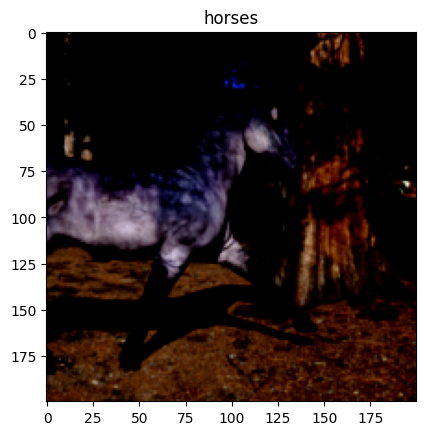

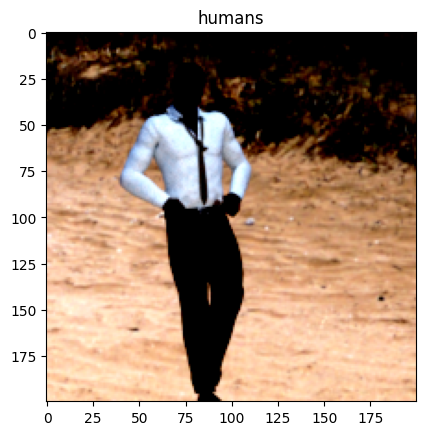

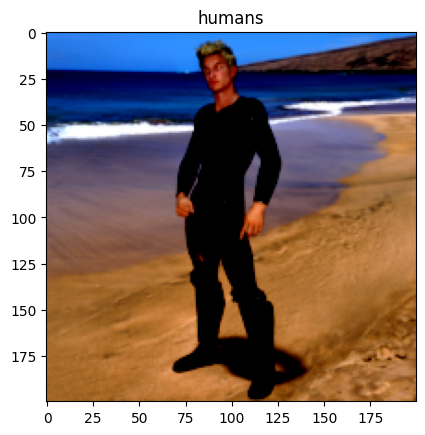

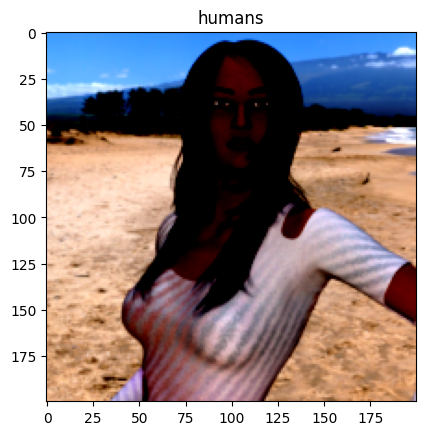

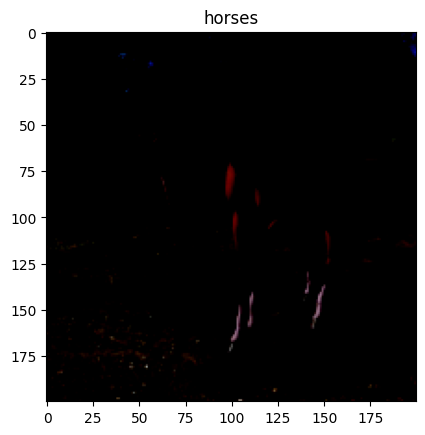

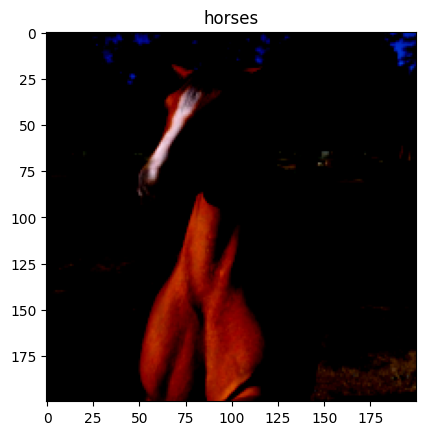

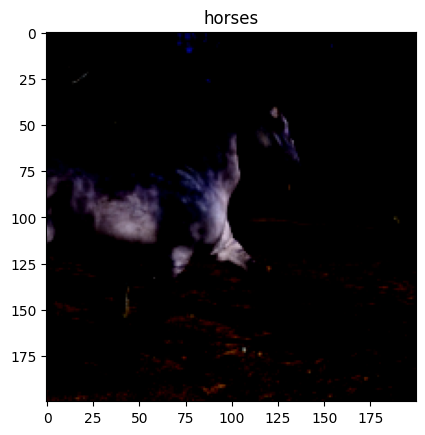

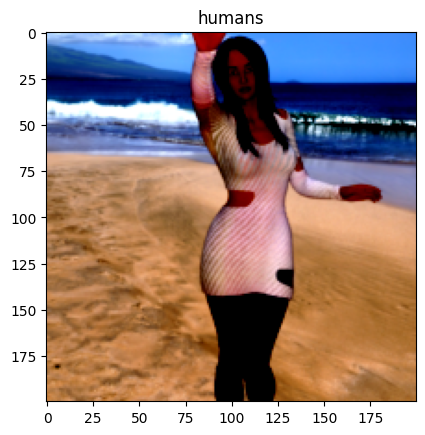

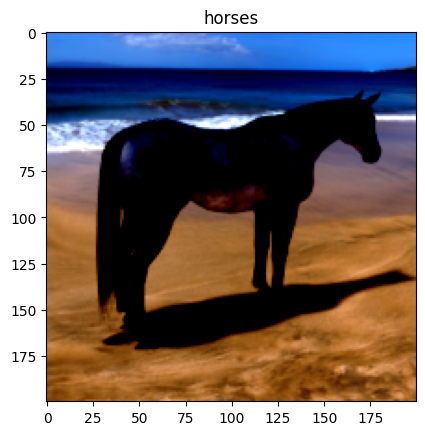

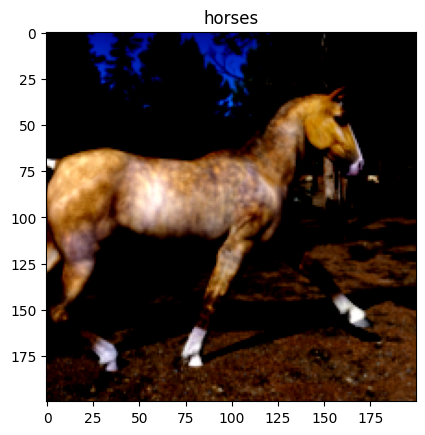

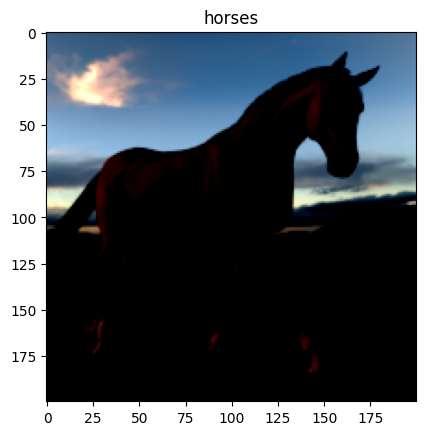

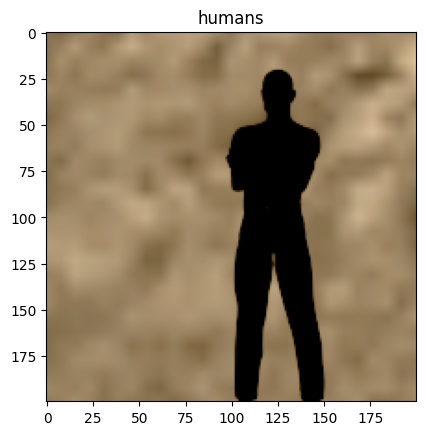

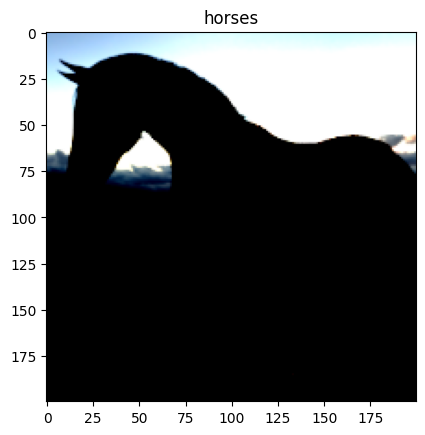

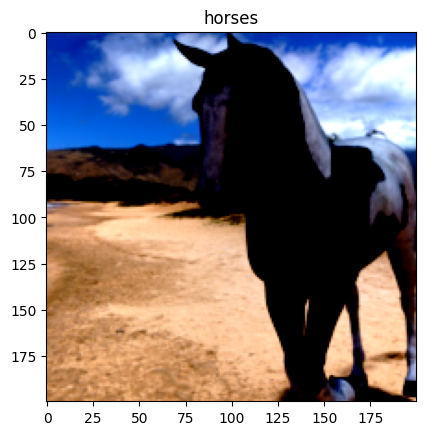

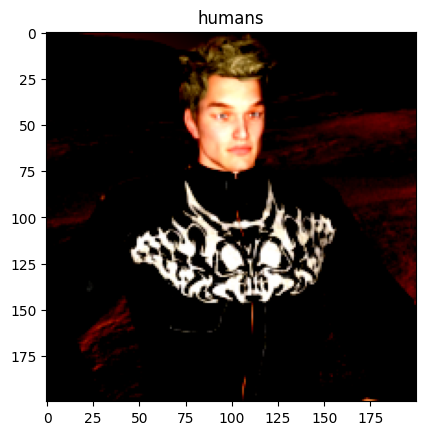

In [59]:
for image, label in test_batches.take(1):
    for i in range(0,32):
        plt.figure()
        plt.imshow(image[i])
        plt.title(get_label_name(label[i]))





In [61]:
for image, label in test_batches.take(1):
    predictions = model.predict(image)
    for i in range(0,32):
        if(predictions[i]<0):
            print("human == " + get_label_name(label[i]))


human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses
human == horses


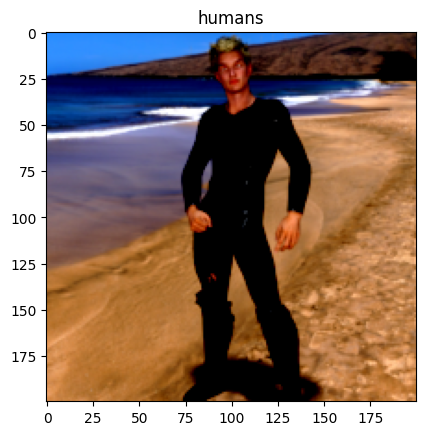

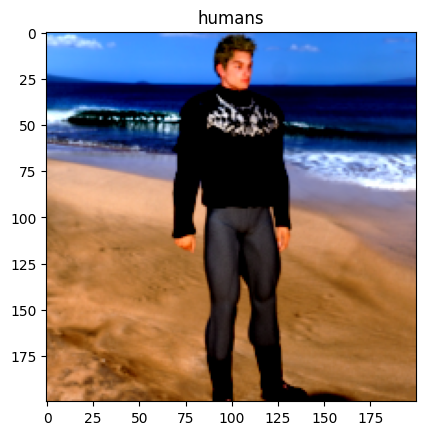

In [22]:
for image, label in test_batches.take(5):
  plt.figure()
  plt.imshow(image[])
  plt.title(get_label_name(label[1]))